In [4]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [5]:
# !pip install import-ipynb

In [6]:
import import_ipynb

In [7]:
# %cd /content/drive/MyDrive/A62_projet_synthese_feature/feature-colab-from-git/notebook

In [9]:
%run iteration_0_imports.py

In [10]:
%run iteration_0_parameters.py

In [12]:
import iteration_0_utils as utils

importing Jupyter notebook from iteration_0_utils.ipynb


In [13]:
%whos

Variable                 Type        Data/Info
----------------------------------------------
HEALTHY                  str         H
IMG_IN_COLOR             int         1
IMG_SIZE                 int         64
Image                    module      <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
NBR_SAMPLE               int         20000
PATH_DATA                str         ../data
PATH_DATA_EDA            str         ../data/eda
PATH_DATA_LIST           str         ../data/list
PATH_DATA_SAMPLE         str         ../data/sample
PATH_MODEL               str         ../model
PATH_ROOT                str         ..
PATH_SOURCE_IMG          str         ../cell_images
RandomForestClassifier   ABCMeta     <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SICK                     str         S
classification_report    function    <function classification_<...>rt at 0x00000204FCE0B790>
confusion_matrix         function    <function confusion_matrix at 0x00000204FCE02820>
cv2   

In [14]:
DATE_TIME = "2021-11-18_20-39-00"

"""
PATH_SAMPLE = "data/sample"
HEALTHY = "H"
SICK = "S"
IMG_SIZE = 400
"""

'\nPATH_SAMPLE = "data/sample"\nHEALTHY = "H"\nSICK = "S"\nIMG_SIZE = 400\n'

# Modele

In [15]:
PATH_DATA_SAMPLE

'../data/sample'

In [16]:
NBR_SAMPLE

20000

In [17]:
DATE_TIME

'2021-11-18_20-39-00'

In [18]:
IMG_SIZE

64

## Random forest

In [21]:
clf = RandomForestClassifier(random_state = 0)

In [41]:
def evaluate(model, X_train, X_test, y_train, y_test, cv = 5):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cbar = False,
                     xticklabels=np.unique(y_train), 
                     yticklabels=np.unique(y_train),
                     fmt='5d') 
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Réel');
    print(classification_report(y_test, y_pred))
    
    
    # ===
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = cv, 
                                               train_sizes =np.linspace(0.1, 1, 10),
                                                scoring = 'f1_macro'
                                          )
    plt.figure(figsize=(12,8))
    axes = plt.gca()
    axes.set_ylim([0.5,1.05])
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation_score')
    plt.legend()
    plt.show()
    # ---
    

2021-11-30 11:11:24.470462
              precision    recall  f1-score   support

           H       0.79      0.77      0.78      2000
           S       0.78      0.79      0.78      2000

    accuracy                           0.78      4000
   macro avg       0.78      0.78      0.78      4000
weighted avg       0.78      0.78      0.78      4000



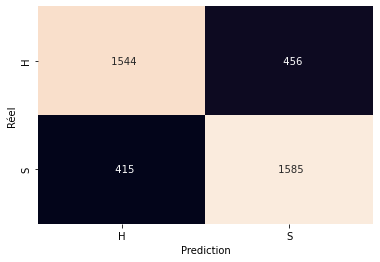

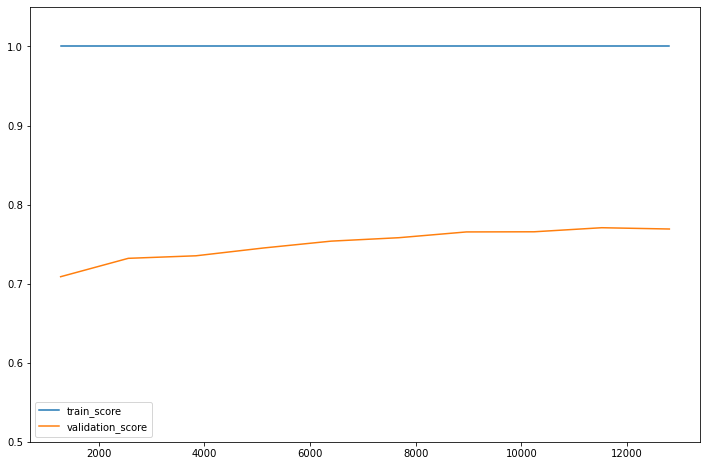

2021-11-30 13:52:14.292092


In [23]:
print(datetime.now())
evaluate(clf, X_train, X_test, y_train, y_test)
print(datetime.now())

In [24]:
# Sauvegarder le modèle
os.makedirs(PATH_MODEL, exist_ok=True)
utils.pickle_save(clf, PATH_MODEL + "/" + "model_rf.pklz")